<a href="https://colab.research.google.com/github/wlsgud623/vaccine_tweet_analysis/blob/main/VaccineHesistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install transformers==3

import transformers
from transformers import BertTokenizer
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"jinhyeoungbae","key":"dc42a77071a666d47d2e97f076322dfb"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d kaushiksuresh147/covidvaccine-tweets
! kaggle datasets download -d gpreda/all-covid19-vaccines-tweets

covidvaccine-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)
all-covid19-vaccines-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip all-covid19-vaccines-tweets.zip
!unzip covidvaccine-tweets.zip

Archive:  all-covid19-vaccines-tweets.zip
replace vaccination_all_tweets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  covidvaccine-tweets.zip
replace covidvaccine.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [6]:
first_vaccine_data = pd.read_csv("/content/covidvaccine.csv", nrows = 50000)
second_vaccine_data = pd.read_csv("/content/vaccination_all_tweets.csv", nrows = 50000)
data_column = ['user_name', 'user_description','user_location','user_followers','text']

first_vaccine_data = first_vaccine_data[data_column]
second_vaccine_data = second_vaccine_data[data_column]

import re

def con(x):
  return ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str(x)).split())
    
first_vaccine_data['text']=first_vaccine_data['text'].apply(con)
second_vaccine_data['text']=second_vaccine_data['text'].apply(con)

analysis_data = pd.concat([first_vaccine_data,second_vaccine_data], ignore_index=True)
analysis_data['text'].dropna()
analysis_data.drop_duplicates()
analysis_data.head()

,user_name,user_description,user_location,user_followers,text
0,MyNewsNE,MyNewsNE a dedicated multi-lingual media house...,Assam,64.0,Australia to Manufacture Covid 19 Vaccine and ...
1,Shubham Gupta,I will tell about all experiences of my life f...,NaN,1.0,Australia is doing very good
2,Journal of Infectiology,Journal of Infectiology (ISSN 2689-9981) is ac...,NaN,143.0,Deaths due to COVID 19 in Affected Countries R...
3,Zane,Fresher than you.,NaN,29.0,Subhashree Stay safe di amp da
4,Ann-Maree O’Connor,Retired university administrator. Melburnian b...,"Adelaide, South Australia",83.0,This is what passes for leadership in our coun...


In [7]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [8]:
sentiment_data  = pd.read_csv("/gdrive/My Drive/sentiment.csv", header=None)
del sentiment_data[0]
sentiment_data.rename(columns={1:'label'}, inplace=True)
sentiment_data.head()

,label
0,2
1,2
2,1
3,2
4,1


In [9]:
print(analysis_data.shape)
print(sentiment_data.shape)

(100000, 5)
(100000, 1)


In [15]:
positive_tweet = pd.DataFrame(columns=['user_name', 'user_description','user_location','user_followers','text'])
neutral_tweet = pd.DataFrame(columns=['user_name', 'user_description','user_location','user_followers','text'])
negative_tweet = pd.DataFrame(columns=['user_name', 'user_description','user_location','user_followers','text'])

for index, values in analysis_data.iterrows():
  if sentiment_data['label'][index] == 0:
    negative_tweet = negative_tweet.append(values, ignore_index=True)

  elif sentiment_data['label'][index] == 1:
    neutral_tweet = neutral_tweet.append(values, ignore_index=True)

  elif sentiment_data['label'][index] == 2:
    positive_tweet = positive_tweet.append(values, ignore_index=True)


In [37]:
index = [0,1,2,3,4]
#positive_tweet = positive_tweet.reset_index(drop=True)
#positive_tweet.head()
#neutral_tweet = neutral_tweet.drop(index)
#neutral_tweet = neutral_tweet.reset_index(drop=True)
#neutral_tweet.head()
#negative_tweet = negative_tweet.drop(index)
#negative_tweet = negative_tweet.reset_index(drop=True)
#negative_tweet.head()

,user_name,user_description,user_location,user_followers,text
0,Dr. Joseph Santoro,"Neuro PhD, #Innovator, #Technologist, #Startup...","Washington, DC 20009",19091.0,Most countries without the ability to make loc...
1,Deepak Sakpal,Full time Parent | Photography | Equity Tradin...,Mumbai - India,68.0,phase 3 trials begin in next 7 10 days what do...
2,Gettodoor,Along with the latest updates of surrounding a...,NaN,49.0,You must tell yourself no matter how hard it i...
3,@TheCupIsNice,"All of the Wrestling Companys,🏀,⚾,🏈,👊MMA and ⚽...","Las Vegas, NV",55.0,your gonna go down as the worst President of a...
4,Ⓜanoj Kumar Sharma,Assistant Chief Content Editor at E TV Bharat,India,470.0,The National Sports Awards likely to be held v...


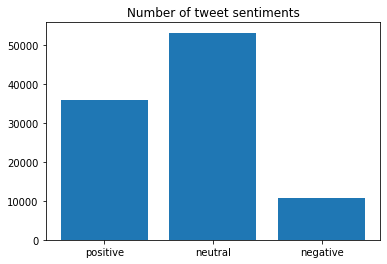

In [47]:
tweet_number =[len(positive_tweet),len(neutral_tweet),len(negative_tweet)]
tweet_label = ['positive','neutral','negative']

plt.bar(tweet_label, tweet_number)
plt.title('Number of tweet sentiments')
plt.show()

# Reason of Hesistant
**Reference paper** : Psychological characteristics and the mediating role of the 5C Model in explaining students’ COVID-19 vaccination intention, Wismans A, Thurik R, Baptista R, Dejardin M, Janssen F

5C Model : Confidence, Calculation, Complacency, Constraints, Collective Responsibility
